<a href="https://colab.research.google.com/github/ruderikissa/Equipo_5-BEDU-Proyecto-Final/blob/main/Proyecto_equipo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=10 color='Steelblue'><center> Proyecto Equipo 5 </center></font>

<font size=6> <center>NLP - Análisis de sentimiento: Clasificación de reseñas de películas </center>

<font size=4> Integrantes:

*   Rodrigo Garmendia Issa
*   Jorge Arista

# <font size=6> Planteamiento del problema

<font size= 3> El manejo del lenguaje natural y cómo obtener información de él históricamente ha sido uno de los temas que más dificultades ha presentado a los científicos de datos debido a la complejidad inherente al lenguaje humano, donde más allá de las palabras usadas, factores como el contexto o el orden sintáctico juegan un rol primordial en el significado de las oraciones,  aunado al hecho de la gran diversidad de formas de expresar una misma idea.

Dentro del análisis de lenguaje natural, un área que ha causado gran interés por su aplicabilidad comercial es el análisis de sentimiento de un texto, el cual consiste en poder asociar una valoración (comúnmente *postivo*, *negativo* y *neutro*) a un escrito. El interés comercial de esta área se debe al *boom* de las plataformas digitales y redes sociales donde la gente puede expresar sus opiniones, lo cual vuelve estos lugares fuentes importantes de información para medir la calidad de un servicio o producto a través del análisis de los comentarios que se hacen sobre él.

# Objetivo

La intención de este proyecto es clasificar las reseñas de películas con una valoración de positivas o negativas.

Abordaremos dos enfoques diferentes para el procesamiento de los textos y la creación de los modelos predictivos, donde se usarán diversos algoritmos de clasificación y posteriormente se medirá  y comparará el desempeño de ambas metodologías para determinar ventajas y desventajas de cada una.

 
Para llevar a cabo el proyecto se realizaron diversas técnicas de NLP para la visualización, comprensión y transformación de los textos, así como el uso de diversos algoritmos de aprendizaje supervisado para realizar la clasificación y se aplicaron diversas métricas para medir el desempeño de los modelos.

# Datos

<font size=3> Esta base de datos se obtuvo de la plataforma [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), dicha base cuenta con un total de 50,000 reseñas de películas extraídas de la página de [IMDB](https://www.imdb.com/). 

# <font size=6> Exploración de datos
<font size=3> Como se mencionó previamente, se trabajó con la base de datos encontrada en Kaggle, el *dataset* se subió en cuatro archivos distintos en el Github de [Rodrigo](https://github.com/ruderikissa/BEDU/tree/main), esto por motivos de limitación de espacio. Posteriormente estos archivos se leyeron y unieron nuevamente en el *Notebook*.

Lo primero que se realizó fue importar las bibliotecas requeridas para la exploración y análisis de los datos. Dado que estamos trabajando con archivos de texto, entre estas herramientas se encuentra NLTK para el procesamiento de lenguaje natural.

In [ ]:
#!pip install nltk
import nltk  # herramientas para el análisis de NLP
import seaborn as sns 
from pylab import * # numpy y matplotlib.pyplot
import pandas as pd  
import re    # análisis de patrones en str
nltk.download('punkt')       # lista de palabras vacías
nltk.download('stopwords')   # y puntación en inglés

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<font size=3> Se importan y leen los 4 archivos que contienen el *data set* a explorar

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/neg_rev1', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/neg_rev2', index_col=0)
data3 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/pos_rev1', index_col=0)
data4 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/pos_rev2', index_col=0)

<font size=3> Se unen los archivos y se verifica que se haya realizado correctamente





In [ ]:
data = pd.concat([data1,data2,data3,data4],ignore_index=True)
data

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
49995,"I loved it, having been a fan of the original ...",positive
49996,Imaginary Heroes is clearly the best film of t...,positive
49997,I got this one a few weeks ago and love it! It...,positive
49998,John Garfield plays a Marine who is blinded by...,positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<font size=3> Notamos que el *data set* únicamente cuenta con dos columnas: la reseña hecha y la valoración positiva o negativa de la misma, ambas columnas de tipo *'object'*


Ahora, checamos cuántas reseñas hay de acuerdo a cada sentimiento.



In [ ]:
data.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


> *Con esto, logramos ver que tenemos una completa igualdad en el número de 
reseñas tanto negativas como positivas, lo cual nos ayudara en los siguientes pasos*



<font size=3> Para hacer una análisis con mayor detalle dividiremos el *data frame* en dos: cada uno conteniendo las reseñas de un tipo de sentimiento. 

In [ ]:
# Data frame con las reseñas positivas
pos_rev = data.query('sentiment== "positive"').reset_index(drop=True)
pos_rev

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive
...,...,...
24995,"I loved it, having been a fan of the original ...",positive
24996,Imaginary Heroes is clearly the best film of t...,positive
24997,I got this one a few weeks ago and love it! It...,positive
24998,John Garfield plays a Marine who is blinded by...,positive


In [ ]:
# Data frame con las reseñas negativas 
neg_rev = data.query('sentiment=="negative"').reset_index(drop=True)
neg_rev

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
24995,This is your typical junk comedy.<br /><br />T...,negative
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24997,I am a Catholic taught in parochial elementary...,negative
24998,I'm going to have to disagree with the previou...,negative


# <font size=6> Análisis de datos y visualización

<font size=3> Una vez explorado el *data set*, procedemos a analizar la información con la que contamos, para ello compararemos las reseñas de acuerdo al sentimiento que las identifica.

Empezamos explorando la distribución de la cantidad de caracteres por reseña.

In [ ]:
neg_rev_len = neg_rev.review.apply(lambda x: len(x))
pos_rev_len = pos_rev.review.apply(lambda x: len(x))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Número de reseñas')

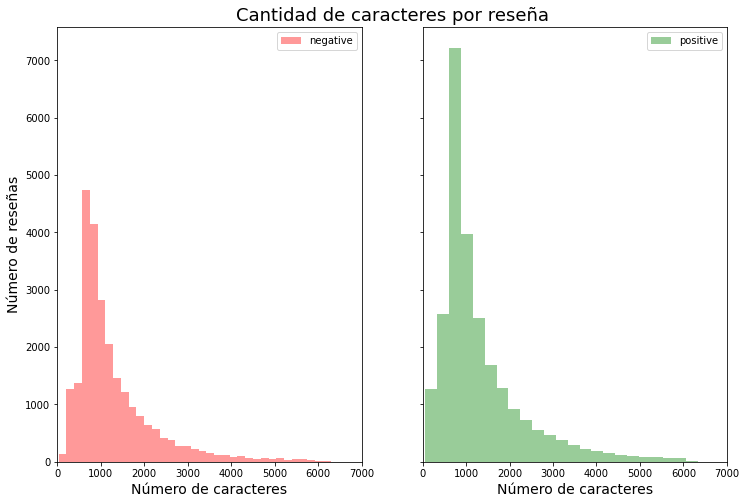

In [ ]:
# Histograma de cantidad de caracteres para reseñas negativas y positivas 
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(1,2, sharey=True)
sns.distplot(neg_rev_len, ax = ax[0], kde=False, color='red', label='negative')
sns.distplot(pos_rev_len, ax = ax[1], kde=False, color='green', label='positive')
ax[0].set_title('Cantidad de caracteres por reseña', x = 1.1, fontsize=18 )
ax[0].set_xlabel('Número de caracteres',fontsize=14)
ax[1].set_xlabel('Número de caracteres',fontsize=14)
ax[0].set_xlim(0,7000)
ax[1].set_xlim(0,7000)
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel('Número de reseñas', fontsize=14)

<font size=3> Ahora, vemos la cantidad de palabras por reseña.

In [ ]:
#Definimos la función contadora de palabras
def word_count(review):
    words = review.split()
    return len(words)
neg_rev_words = neg_rev.review.apply(word_count)
pos_rev_words = pos_rev.review.apply(word_count)

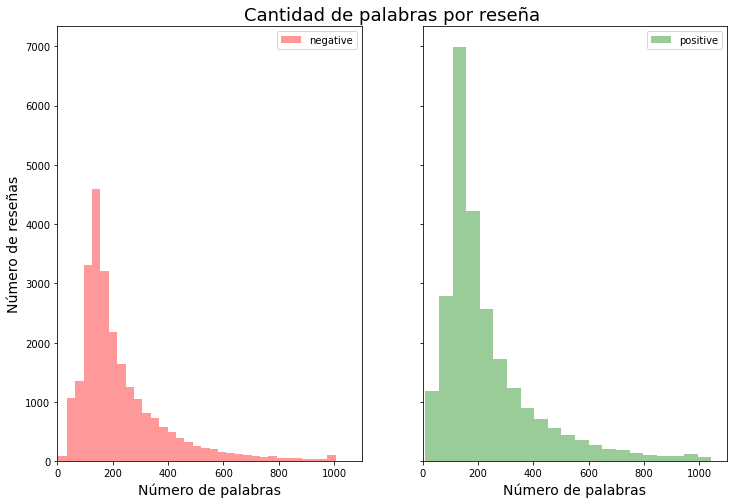

In [ ]:
# Aplicamos la función a las reseñas positivas y graficamos
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(1,2, sharey=True)
sns.distplot(neg_rev_words, ax = ax[0], kde=False, color='red', label='negative')
sns.distplot(pos_rev_words, ax = ax[1], kde=False, color='green', label='positive')
ax[0].set_title('Cantidad de palabras por reseña', x = 1.1, fontsize=18)
ax[0].set_ylabel('Número de reseñas', fontsize=14)
ax[0].set_xlabel('Número de palabras', fontsize=14)
ax[1].set_xlabel('Número de palabras', fontsize=14)
ax[0].set_xlim(0,1100)
ax[1].set_xlim(0,1100)
ax[0].legend()
ax[1].legend()



> *Con estos histogramas logramos dimensionar el número de palabras que se ocupan en las reseñas*



In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='winter')
neg_words = neg_rev.review.apply(lambda x: ' '.join(x))
pos_words = pos_rev.review.apply(lambda x: ' '.join(x))


Valoraciones Negativas

(-0.5, 399.5, 199.5, -0.5)

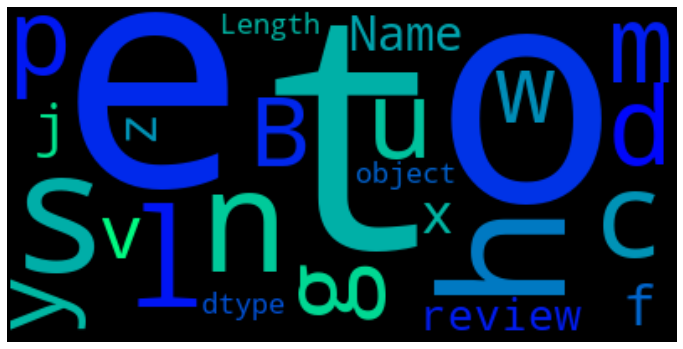

In [ ]:
wordcloud.generate(str(neg_words))
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

Valoraciones Positivas

(-0.5, 399.5, 199.5, -0.5)

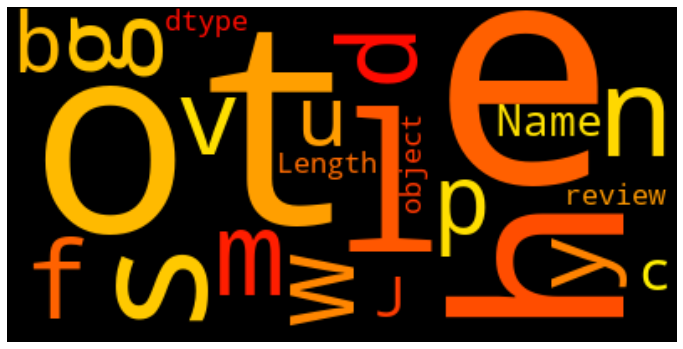

In [ ]:
wordcloud = WordCloud(colormap='autumn')
wordcloud.generate(str(pos_words))
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

<font size=3> Notamos que las palabras que más se repiten son letras sueltas y otras palabras que no aportan nada. Por lo cual visualizaremos un ejemplo por cada sentimiento para saber a qué se debe

In [ ]:
# Reseña negativa
neg_example = neg_rev.loc[24994][0]
neg_example

"Robert Colomb has two full-time jobs. He's known throughout the world as a globetrotting TV reporter. Less well-known but equally effortful are his exploits as a full-time philanderer.<br /><br />I saw `Vivre pour Vivre' dubbed in English with the title 'Live for Life.' Some life! Robert seems to always have at least three women in his life: one mistress on her way out, one on her way in, and the cheated wife at home. It helps that Robert is a glib liar. Among his most useful lies are `I'll call you tomorrow' and `My work took longer than planned.' He spends a lot of time and money on planes, trains and hotel rooms for his succession of liaisons. You wonder when this guy will get caught with his pants down.<br /><br />Some may find his life exciting, but I thought it to be tedious. His companions, including his wife, Catherine, are all attractive and desirable women. But his lifestyle is so hectic and he is so deceitful, you wonder if he's enjoying all this.<br /><br />Adding to the t

In [ ]:
# Reseña positiva 
pos_example = pos_rev.loc[1][0]
pos_example

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

<font size=3> Se puede observar que el texto es en formato *crudo* de html por lo cual contiene mucha notacion propia del lenguaje, así que se requerirá limpiar las reseñas de esta notación.

#  <font size=6> Limpieza de datos

<font size=3> Notemos que las reseñas tienen varios caracteres que no son palabras ni aportan información relevante, por lo que se procede a limpiar las reseñas. 

In [ ]:
# Se define la función de limpieza para las reseñas
from nltk.corpus import stopwords
def clean_review(review):
    # Se transforman en minúsculas todas las letras
    review = review.lower()
    # Se eliminan los caracteres de html
    review = re.sub(r'<.*?>',' ', review)
    # Se eliminan las ligas de internet
    review = re.sub(r'http[s]?.*',' ',review)
    # Se eliminan los dígitos
    review = re.sub('\d',' ',review)
    # Se eliminan el resto de caracteres que no sean letras.
    review = re.sub('[^\w]+',' ', review)
    # Se eliminan posibles espacios extras
    review = review.strip()
    return review

<font size=3> Aplicamos la limpieza a las reseñas. 

In [ ]:
neg_rev_clean = neg_rev.review.apply(clean_review)
pos_rev_clean = pos_rev.review.apply(clean_review)

<font size=3> Y vemos un ejemplo previo y posterior a la limpieza por cada sentimiento.

1.   <font size=3> Reseña negativa sin limpieza:

In [ ]:
neg_example = neg_rev.loc[24994][0]
neg_example

"Robert Colomb has two full-time jobs. He's known throughout the world as a globetrotting TV reporter. Less well-known but equally effortful are his exploits as a full-time philanderer.<br /><br />I saw `Vivre pour Vivre' dubbed in English with the title 'Live for Life.' Some life! Robert seems to always have at least three women in his life: one mistress on her way out, one on her way in, and the cheated wife at home. It helps that Robert is a glib liar. Among his most useful lies are `I'll call you tomorrow' and `My work took longer than planned.' He spends a lot of time and money on planes, trains and hotel rooms for his succession of liaisons. You wonder when this guy will get caught with his pants down.<br /><br />Some may find his life exciting, but I thought it to be tedious. His companions, including his wife, Catherine, are all attractive and desirable women. But his lifestyle is so hectic and he is so deceitful, you wonder if he's enjoying all this.<br /><br />Adding to the t

2.   <font size=3> Reseña negativa limpia:

In [ ]:
neg_clean_example = neg_rev_clean[24994]
neg_clean_example

'robert colomb has two full time jobs he s known throughout the world as a globetrotting tv reporter less well known but equally effortful are his exploits as a full time philanderer i saw vivre pour vivre dubbed in english with the title live for life some life robert seems to always have at least three women in his life one mistress on her way out one on her way in and the cheated wife at home it helps that robert is a glib liar among his most useful lies are i ll call you tomorrow and my work took longer than planned he spends a lot of time and money on planes trains and hotel rooms for his succession of liaisons you wonder when this guy will get caught with his pants down some may find his life exciting but i thought it to be tedious his companions including his wife catherine are all attractive and desirable women but his lifestyle is so hectic and he is so deceitful you wonder if he s enjoying all this adding to the tedium is considerable footage that doesn t further the plot the

1.   <font size=3> Reseña positiva sin limpieza:

In [ ]:
pos_example = pos_rev.loc[1][0]
pos_example

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

2.   <font size=3>Reseña positiva limpia

In [ ]:
pos_clean_example = pos_rev_clean[1]
pos_clean_example

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done'

<font size=3> Ya hecha la limpieza, procedemos a 'tokenizar' las reseñas, es decir, cada reseña la convertimos en una lista con cada palabra como un elemento independiente.

In [ ]:
neg_rev_clean = neg_rev_clean.apply(nltk.word_tokenize)
pos_rev_clean = pos_rev_clean.apply(nltk.word_tokenize)

<font size=3> Creamos un *'corpus'* de palabras para cada sentimiento.

In [ ]:
neg_corpus = [words[i] for words in neg_rev_clean for i in range(len(words))]
pos_corpus = [words[i] for words in pos_rev_clean for i in range(len(words))]

<font size=3> Se crea un diccionario con los frecuencias de cada palabra en los *data frames* y visualizamos cuáles son las más fercuentes para cada sentimiento.

In [ ]:
# Diccionario de frecuencias
neg_freq_dist = nltk.FreqDist(neg_corpus)
pos_freq_dist = nltk.FreqDist(pos_corpus)

In [ ]:
# Las 30 más comunes de cada data frame
neg_30_most_common = np.array(list(map(lambda x: list(x), neg_freq_dist.most_common(30))))
pos_30_most_common = np.array(list(map(lambda x: list(x), pos_freq_dist.most_common(30))))

Text(0, 0.5, 'Palabras')

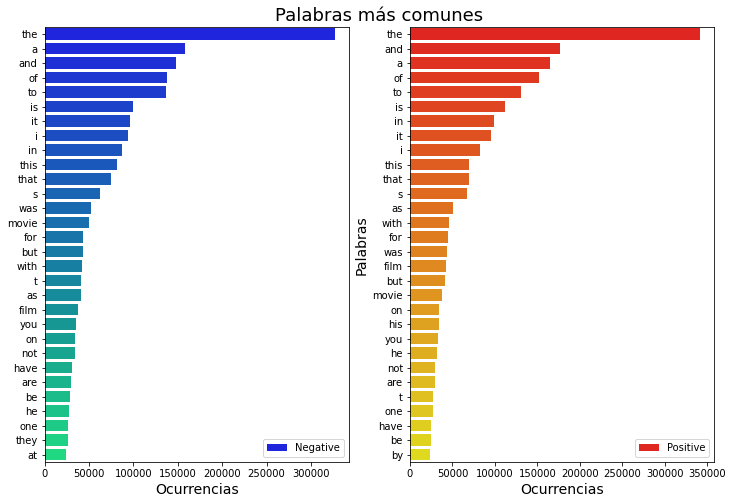

In [ ]:
fig = plt.figure(figsize=(12,8),)
axes = fig.subplots(nrows=1, ncols=2)
sns.barplot(y=neg_30_most_common[:,0], x=neg_30_most_common[:,1].astype('int'), ax= axes[0], label='Negative', palette='winter')
sns.barplot(y=pos_30_most_common[:,0], x=pos_30_most_common[:,1].astype('int'), ax= axes[1], label='Positive', palette='autumn')
axes[0].set_title('Palabras más comunes', fontsize=18, x=1.1)
axes[0].set_xlabel('Ocurrencias',fontsize=14)
axes[1].set_xlabel('Ocurrencias',fontsize=14)
axes[0].legend()
axes[1].legend()
plt.ylabel('Palabras', fontsize=14)

<font size=3> Como era de esperarse las palabras más frecuentes son palabras vacías, es decir, palabras que sirven como conectores sintácticos pero no aportan información, por lo que procedemos a eliminarlas.

<font size=3> Visualizamos la distribución de longitudes de todas las palabras.

In [ ]:
neg_word_length = pd.Series([len(word) for word in neg_corpus])
pos_word_length = pd.Series([len(word) for word in pos_corpus])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


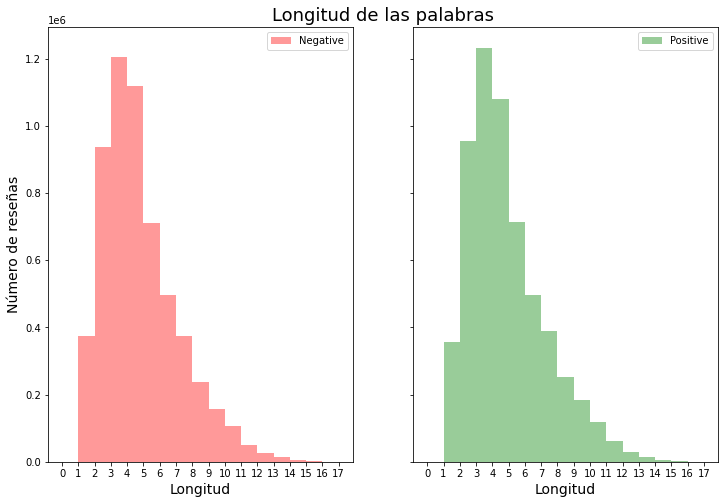

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(1,2, sharey=True)
sns.distplot(neg_word_length, kde=False, color='red', ax = ax[0], bins=[* range(0,18)], label='Negative')
sns.distplot(pos_word_length, kde=False, color='green', ax=ax[1], bins=[* range(0,18)], label='Positive')
ax[0].set_title('Longitud de las palabras', x=1.1, fontsize=18)
ax[0].set_xlabel('Longitud', fontsize=14)
ax[1].set_xlabel('Longitud', fontsize=14)
ax[0].set_ylabel('Número de reseñas', fontsize=14)
ax[0].legend()
ax[1].legend()
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[1].xaxis.set_major_locator(MultipleLocator(1))

In [ ]:
stopwords = stopwords.words('english') #Palabras vacías en inglés
neg_corpus_clean = [word for word in neg_corpus if word not in stopwords] 
pos_corpus_clean = [word for word in pos_corpus if word not in stopwords]

<font size=3> Creamos nuevamente el diccionario de frecuencias sin las palabras vacías y visualizamos.

In [ ]:
neg_freq_dist = nltk.FreqDist(neg_corpus_clean)
pos_freq_dist = nltk.FreqDist(pos_corpus_clean)

In [ ]:
neg_30_most_common = np.array(list(map(lambda x: list(x), neg_freq_dist.most_common(30))))
pos_30_most_common = np.array(list(map(lambda x: list(x), pos_freq_dist.most_common(30))))

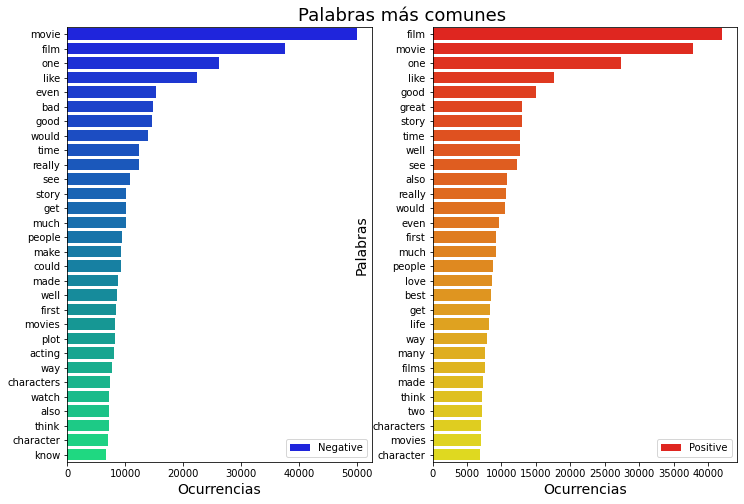

In [ ]:
fig = plt.figure(figsize=(12,8))
axes = fig.subplots(nrows=1, ncols=2)
sns.barplot(x=neg_30_most_common[:,1].astype('int'), y=neg_30_most_common[:,0], ax=axes[0], palette='winter', label='Negative')
sns.barplot(y=pos_30_most_common[:,0], x=pos_30_most_common[:,1].astype('int'), ax=axes[1], palette='autumn', label='Positive')
axes[0].set_title('Palabras más comunes', fontsize=18, x=1.1)
axes[0].set_xlabel('Ocurrencias', fontsize=14)
axes[1].set_xlabel('Ocurrencias', fontsize=14)
plt.ylabel('Palabras', fontsize=14)
axes[0].legend()
axes[1].legend()

<font size=3> También veamos la distribución de la longitud de palabras de estos nuevos *'corpus'.*

In [ ]:
neg_word_length = pd.Series([len(word) for word in neg_corpus_clean])
pos_word_length = pd.Series([len(word) for word in pos_corpus_clean])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


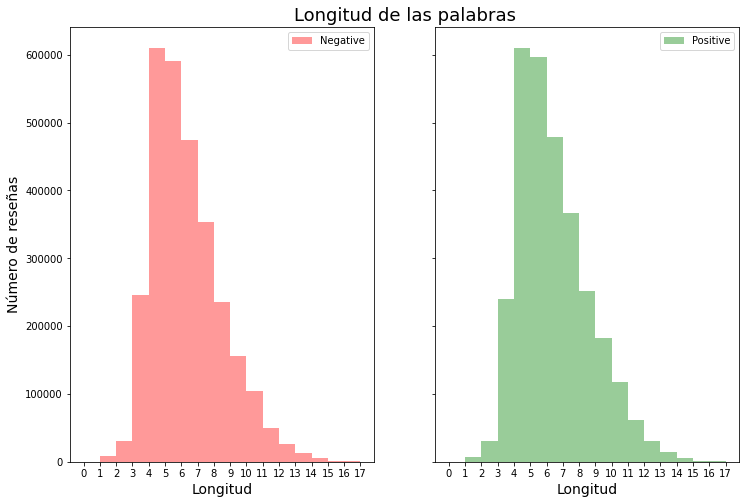

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(nrows=1, ncols=2, sharey=True)
sns.distplot(neg_word_length, kde=False, color='red', ax = ax[0], bins=[* range(0,18)], label='Negative')
sns.distplot(pos_word_length, kde=False, color='green', ax=ax[1], bins=[* range(0,18)], label='Positive')
ax[0].set_title('Longitud de las palabras', x=1.1, fontsize=18)
ax[0].set_xlabel('Longitud', fontsize=14)
ax[1].set_xlabel('Longitud', fontsize=14)
ax[0].set_ylabel('Número de reseñas', fontsize=14)
ax[0].legend()
ax[1].legend()
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[1].xaxis.set_major_locator(MultipleLocator(1))

> Notamos cómo la cantidad de palabras de 1 y 2 caracteres se redujo considerablemente 

In [ ]:
wordcloud = WordCloud(colormap='winter')
neg_words = neg_rev_clean.apply(lambda x: ' '.join(x))
pos_words = pos_rev_clean.apply(lambda x: ' '.join(x))


Valoraciones Negativas

(-0.5, 399.5, 199.5, -0.5)

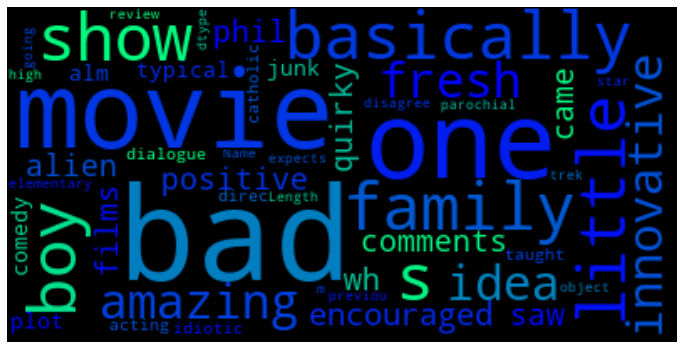

In [ ]:
plt.figure(figsize=(12,9))
wordcloud.generate(str(neg_words))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

Valoraciones Positivas

(-0.5, 399.5, 199.5, -0.5)

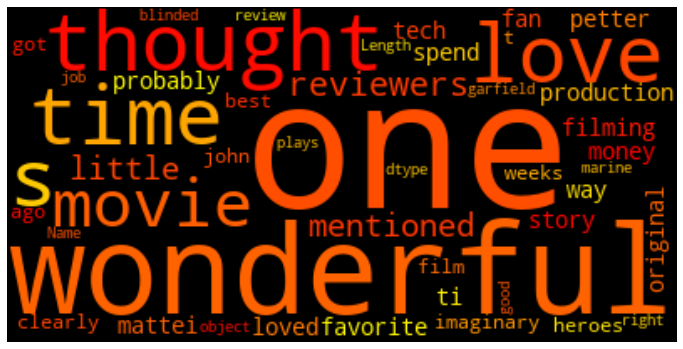

In [ ]:
plt.figure(figsize=(12,9))
wordcloud = WordCloud(colormap='autumn')
wordcloud.generate(str(pos_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Con esta última visualización es evidente que las palabras más usadas en ambas categorías es 'one', 'movie' y 'film', mientras que las 'wonderful' y 'love' aparecen frecuentemente en las reseñas positivas y 'bad' y 'family' en las negativas.

# <font size=6> Preprocesamiento

<font size=3> Una vez visualizados los textos y visto el comportamiento de los datos de acuerdo a cada sentimiento, nos proponemos a preparar los datos para entrenar el modelo.

Empezamos creando una nueva columna donde se almacenaran los datos ya preparados. Lo primero que hacemos es aplicar la función *clean_review* definida previamente.



In [ ]:
pos_rev['review_clean'] = pos_rev.review.apply(clean_review)
pos_rev.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
4,"Probably my all-time favorite movie, a story o...",positive,probably my all time favorite movie a story of...


In [ ]:
neg_rev['review_clean'] = neg_rev.review.apply(clean_review)
neg_rev.head()

,review,sentiment,review_clean
0,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
1,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative idea...
2,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
3,Phil the Alien is one of those quirky films wh...,negative,phil the alien is one of those quirky films wh...
4,I saw this movie when I was about 12 when it c...,negative,i saw this movie when i was about when it came...


<font size=3> Procedemos a 'tokenizar' los textos.

In [ ]:
pos_rev['review_clean'] = pos_rev.review_clean.apply(nltk.word_tokenize)
neg_rev['review_clean'] = neg_rev.review_clean.apply(nltk.word_tokenize)

<font size=3> Luego, 'estematizamos' las palabras, es decir, reducimos a su raíz común las palabras que tienen un mismo origen. Esto para reducir la cantidad de palabras con las que queremos trabajar.

In [ ]:
stemmer = nltk.PorterStemmer()
def more_cleaning(review):
    stemmer = nltk.PorterStemmer()
    words = [stemmer.stem(word) for word in review if word not in stopwords]
    return words


In [ ]:
pos_rev['review_clean'] = pos_rev.review_clean.apply(more_cleaning)
neg_rev['review_clean'] = neg_rev.review_clean.apply(more_cleaning)


<font size=3> Ahora, nos enfocamos en codificar numéricamente los sentimientos, asignamos el valor de 0 para los negativos y de 1 a los positivos.

In [ ]:
neg_rev['sentiment_encoded'] = [0 for _ in range(25000)]
pos_rev['sentiment_encoded'] = [1 for _ in range(25000)]

In [ ]:
neg_rev.head()

,review,sentiment,review_clean,sentiment_encoded
0,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi...",0
1,"This show was an amazing, fresh & innovative i...",negative,"[show, amaz, fresh, innov, idea, first, air, f...",0
2,Encouraged by the positive comments about this...,negative,"[encourag, posit, comment, film, look, forward...",0
3,Phil the Alien is one of those quirky films wh...,negative,"[phil, alien, one, quirki, film, humour, base,...",0
4,I saw this movie when I was about 12 when it c...,negative,"[saw, movi, came, recal, scariest, scene, big,...",0


In [ ]:
pos_rev.head()

,review,sentiment,review_clean,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, oz, episod, hook...",1
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass...",1
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe...",1
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st...",1
4,"Probably my all-time favorite movie, a story o...",positive,"[probabl, time, favorit, movi, stori, selfless...",1


<font size=3> Lo que sigue es dividir nuestro *data set* en conjuntos de entrenamiento y prueba. Para garantizar que haya una proporción idéntica de datos con las etiquetas '0' y '1' en ambos conjuntos, se divide por separado en prueba y entrenamiento los *data frames*  *'pos_rev'* y *'neg_rev'*,  para posteriormente unir los similares (*'train_neg' + 'train_pos'* y *'test_pos'+'test_neg'*).

In [ ]:
# Creamos el conjunto de entrenamiento para las reseñas postivas
train_pos = pos_rev.sample(frac=0.8, random_state=7)
train_pos

,review,sentiment,review_clean,sentiment_encoded
21752,Another detailed work on the subject by Dr Dwi...,positive,"[anoth, detail, work, subject, dr, dwivedi, ta...",1
7208,"Although the plot was a bit sappy at times, an...",positive,"[although, plot, bit, sappi, time, rush, end, ...",1
17058,"Noni Hazlehurst, Colin Friels, Alice Garner, C...",positive,"[noni, hazlehurst, colin, friel, alic, garner,...",1
20754,so. i was completely in love with this movie. ...,positive,"[complet, love, movi, gaga, even, plot, twist,...",1
22505,Being someone who lists Night of the Living De...,positive,"[someon, list, night, live, dead, number, thre...",1
...,...,...,...,...
18965,Yeah I watched this mini series with My Mom an...,positive,"[yeah, watch, mini, seri, mom, dad, kid, one, ...",1
22154,"I love the premise, but it's replay value is o...",positive,"[love, premis, replay, valu, certain, part, op...",1
1253,"Jeff Lieberman's ""Just Before Dawn"" is definit...",positive,"[jeff, lieberman, dawn, definit, one, underr, ...",1
10039,I have to agree with most of the other posts. ...,positive,"[agre, post, comedi, drama, lean, littl, much,...",1


<font size=3> Creamos una máscara con los índices de *'train_pos'* y aplicamos a los demás conjuntos, esto para simplificar la separación y grantizar las misma proporción de reseñas con las dos etiquetas en ambos conjuntos.

In [ ]:
# Ordenamos los índices para optimizar el cómputo
idx = train_pos.sort_index().index.to_list()
# Creamos la máscara
mask = np.array([True if x not in idx else False for x in range(25000)])
# Aplicamos la máscara a 'pos_rev'
test_pos = pos_rev[mask]
test_pos

,review,sentiment,review_clean,sentiment_encoded
6,If you like original gut wrenching laughter yo...,positive,"[like, origin, gut, wrench, laughter, like, mo...",1
7,This a fantastic movie of three prisoners who ...,positive,"[fantast, movi, three, prison, becom, famou, o...",1
10,After the success of Die Hard and it's sequels...,positive,"[success, die, hard, sequel, surpris, realli, ...",1
14,'War movie' is a Hollywood genre that has been...,positive,"[war, movi, hollywood, genr, done, redon, mani...",1
22,Preston Sturgis' THE POWER AND THE GLORY was u...,positive,"[preston, sturgi, power, glori, unseen, public...",1
...,...,...,...,...
24967,I first saw this movie in the night program of...,positive,"[first, saw, movi, night, program, one, favour...",1
24973,Having read all of the comments on this film I...,positive,"[read, comment, film, still, amaz, fox, reluct...",1
24992,"Dog Bite Dog isn't going to be for everyone, b...",positive,"[dog, bite, dog, go, everyon, realli, enjoy, f...",1
24997,I got this one a few weeks ago and love it! It...,positive,"[got, one, week, ago, love, modern, light, fil...",1


In [ ]:
# Aplicamos el complemento de la máscara  a 'neg_rev'
train_neg = neg_rev[~mask]
train_neg

,review,sentiment,review_clean,sentiment_encoded
0,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi...",0
1,"This show was an amazing, fresh & innovative i...",negative,"[show, amaz, fresh, innov, idea, first, air, f...",0
2,Encouraged by the positive comments about this...,negative,"[encourag, posit, comment, film, look, forward...",0
3,Phil the Alien is one of those quirky films wh...,negative,"[phil, alien, one, quirki, film, humour, base,...",0
4,I saw this movie when I was about 12 when it c...,negative,"[saw, movi, came, recal, scariest, scene, big,...",0
...,...,...,...,...
24993,"Les Visiteurs, the first movie about the medie...",negative,"[le, visiteur, first, movi, mediev, time, trav...",0
24994,Robert Colomb has two full-time jobs. He's kno...,negative,"[robert, colomb, two, full, time, job, known, ...",0
24995,This is your typical junk comedy.<br /><br />T...,negative,"[typic, junk, comedi, almost, laugh, genuin, m...",0
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",0


In [ ]:
# Aplicamos la máscara a 'neg_rev'
test_neg = neg_rev[mask]
test_neg

,review,sentiment,review_clean,sentiment_encoded
6,The cast played Shakespeare.<br /><br />Shakes...,negative,"[cast, play, shakespear, shakespear, lost, app...",0
7,"Kind of drawn in by the erotic scenes, only to...",negative,"[kind, drawn, erot, scene, realiz, one, amateu...",0
10,I had the terrible misfortune of having to vie...,negative,"[terribl, misfortun, view, b, movi, entireti, ...",0
14,This movie was so frustrating. Everything seem...,negative,"[movi, frustrat, everyth, seem, energet, total...",0
22,"Of all the films I have seen, this one, The Ra...",negative,"[film, seen, one, rage, got, one, worst, yet, ...",0
...,...,...,...,...
24967,This was a very brief episode that appeared in...,negative,"[brief, episod, appear, one, night, galleri, s...",0
24973,"My thoughts on the movie, 9<br /><br />It was ...",negative,"[thought, movi, good, good, visual, great, ple...",0
24992,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,"[lame, lame, lame, minut, cring, fest, minut, ...",0
24997,I am a Catholic taught in parochial elementary...,negative,"[cathol, taught, parochi, elementari, school, ...",0


<font size=3> Finalmente unimos los conjuntos positivos y negativos para entrenamiento y prueba.

In [ ]:
data_train = pd.concat([train_neg,train_pos],ignore_index=True)
data_test = pd.concat([test_neg,test_pos],ignore_index=True)

Y para no sesgar el algoritmo, mezclamos el orden.

In [ ]:
data_train = data_train.sample(frac=1)
data_train.head()

,review,sentiment,review_clean,sentiment_encoded
29671,If it had been made 2 years later it would hav...,positive,"[made, year, later, would, ban, number, one, m...",1
4117,I gave this 3 stars out of a possible 10 - bec...,negative,"[gave, star, possibl, stori, open, end, left, ...",0
29819,This if the first movie I've given a 10 to in ...,positive,"[first, movi, given, year, ever, movi, need, w...",1
38032,"""Kaabee"" depicts the hardship of a woman in pr...",positive,"[kaabe, depict, hardship, woman, pre, wwii, ra...",1
5684,Is it a coincidence that Orca was made two yea...,negative,"[coincid, orca, made, two, year, jaw, orca, ex...",0


In [ ]:
data_test = data_test.sample(frac=1)
data_test.head()

,review,sentiment,review_clean,sentiment_encoded
1634,I can't believe I watched this whole movie. An...,negative,"[believ, watch, whole, movi, anoth, ishtar, ke...",0
2739,This movie was seriously awful. The acting was...,negative,"[movi, serious, aw, act, worst, wors, student,...",0
4483,In 1976 a mother named Norma Lewis (Cameron Di...,negative,"[mother, name, norma, lewi, cameron, diaz, liv...",0
4250,I saw this trailer and thought to myself my go...,negative,"[saw, trailer, thought, god, movi, real, would...",0
9890,"When this movie firt came out in 1995, I found...",positive,"[movi, firt, came, found, amazingli, great, es...",1


# Modelo 1: Enfoque frecuentista

<font size=3> Como sabemos, los algoritmos de Machine Learning no pueden interpretar cadenas de texto, sino vectores y matrices, por lo que debemos transformar nuestras reseñas en vectores de manera que los algoritmos puedan procesarlos. Para realizar esta transformación, primero vamos a realizar una aproximación frecuentista, es decir, **los valores con los que vamos a alimentar el algoritmo representan las veces que cada palabra se encontró tanto en las reseñas positivas como en las negativas**. Dicho esto, creamos nuevamente los *'corpus'* y los diccionarios de frecuencias correspondientes. 

## Creación de los vectores

In [ ]:
# Creamos los corpus para ambas etiquetas con los datos de entrenamiento
train_neg_corpus = [words[i] for words in train_neg.review_clean for i in range(len(words))]
train_pos_corpus = [words[i] for words in train_pos.review_clean for i in range(len(words))] 

In [ ]:
print('Longitud del corpus positivo:\t', len(train_pos_corpus))
print('\nLongitud del corpus negativo: \t', len(train_neg_corpus))

Longitud del corpus positivo:	 2397697

Longitud del corpus negativo: 	 2341733


In [ ]:
# Creamos nuevamente los diccionarios de frecuencias
neg_freq = nltk.FreqDist(train_neg_corpus)
pos_freq = nltk.FreqDist(train_pos_corpus)

In [ ]:
len(neg_freq.values())

44488

<font size=3> Lo que sigue es traducir el texto a números de forma que el algoritmo pueda leerlo, así que creamos la función *'vectorize_review'*, la cual a cada palabra la convierte en un vector, la primera entrada corresponde a la frecuencia con que dicha palabra se encuentra en el *corpus positivo* y  la segunda entrada es igual a la frecuencia de la palabra en el *corpus negativo*, por último, la suma de los *vectores-palabra* representan el vector asociado a cada reseña.

In [ ]:
def vectorize_review(review):
  #Creamos un vector de 3 entradas
  x = np.zeros((1,3))
  # primera entrada igual a 1
  x[0,0] = 1 
  for word in review:
    # Segunda entrada es la suma de la frecuencias de cada palabra positiva en la reseña
    x[0,1] += pos_freq.get(word,0)
    # Tercera entrada es la suma de las frecuencias de cada palabra negativa en la reseña
    x[0,2] += neg_freq.get(word,0)
  return x

In [ ]:
# Aplicamos la función a 'data_train'
data_train['review_vectorized'] = data_train.review_clean.apply(vectorize_review)
data_train.head() 

,review,sentiment,review_clean,sentiment_encoded,review_vectorized
29671,If it had been made 2 years later it would hav...,positive,"[made, year, later, would, ban, number, one, m...",1,"[[1.0, 447204.0, 424769.0]]"
4117,I gave this 3 stars out of a possible 10 - bec...,negative,"[gave, star, possibl, stori, open, end, left, ...",0,"[[1.0, 370151.0, 352464.0]]"
29819,This if the first movie I've given a 10 to in ...,positive,"[first, movi, given, year, ever, movi, need, w...",1,"[[1.0, 339162.0, 376326.0]]"
38032,"""Kaabee"" depicts the hardship of a woman in pr...",positive,"[kaabe, depict, hardship, woman, pre, wwii, ra...",1,"[[1.0, 487171.0, 484111.0]]"
5684,Is it a coincidence that Orca was made two yea...,negative,"[coincid, orca, made, two, year, jaw, orca, ex...",0,"[[1.0, 553978.0, 635294.0]]"


In [ ]:
# Aplicamos la función a 'data_test'
data_test['review_vectorized'] = data_test.review_clean.apply(vectorize_review)
data_test.head() 

,review,sentiment,review_clean,sentiment_encoded,review_vectorized
1634,I can't believe I watched this whole movie. An...,negative,"[believ, watch, whole, movi, anoth, ishtar, ke...",0,"[[1.0, 382318.0, 450880.0]]"
2739,This movie was seriously awful. The acting was...,negative,"[movi, serious, aw, act, worst, wors, student,...",0,"[[1.0, 393388.0, 488881.0]]"
4483,In 1976 a mother named Norma Lewis (Cameron Di...,negative,"[mother, name, norma, lewi, cameron, diaz, liv...",0,"[[1.0, 1270711.0, 1213381.0]]"
4250,I saw this trailer and thought to myself my go...,negative,"[saw, trailer, thought, god, movi, real, would...",0,"[[1.0, 620435.0, 705029.0]]"
9890,"When this movie firt came out in 1995, I found...",positive,"[movi, firt, came, found, amazingli, great, es...",1,"[[1.0, 162560.0, 180431.0]]"


<font size=3> Definimos el *'target'* como el sentimiento codificado y los *'features'* como la reseña vectorizada.

In [ ]:
y_train = data_train.sentiment_encoded
y_test = data_test.sentiment_encoded

<font size=3> Separamos la reseña vectorizada en cada una de sus entradas en los conjuntos de entrenamiento y prueba, y validamos.

In [ ]:
x_train = np.array([*data_train.review_vectorized])
x_test = np.array([*data_test.review_vectorized])
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)

In [ ]:
print(' X_train : \n\n', x_train[:5])
print('\nY_train: \n\n', y_train[:5])

 X_train : 

 [[1.00000e+00 4.47204e+05 4.24769e+05]
 [1.00000e+00 3.70151e+05 3.52464e+05]
 [1.00000e+00 3.39162e+05 3.76326e+05]
 [1.00000e+00 4.87171e+05 4.84111e+05]
 [1.00000e+00 5.53978e+05 6.35294e+05]]

Y_train: 

 29671    1
4117     0
29819    1
38032    1
5684     0
Name: sentiment_encoded, dtype: int64


In [ ]:
print(' X_test : \n\n', x_test[:5])
print('\nY_test: \n\n', y_test[:5])

 X_test : 

 [[1.000000e+00 3.823180e+05 4.508800e+05]
 [1.000000e+00 3.933880e+05 4.888810e+05]
 [1.000000e+00 1.270711e+06 1.213381e+06]
 [1.000000e+00 6.204350e+05 7.050290e+05]
 [1.000000e+00 1.625600e+05 1.804310e+05]]

Y_test: 

 1634    0
2739    0
4483    0
4250    0
9890    1
Name: sentiment_encoded, dtype: int64




> Los pasos realizados, fuerón para preparar la información y que esta sea fácil de procesar al momento de entrenar



##  Entrenamiento del Modelo

<font size=3> Una vez finalizado la preparación de los datos, nos proponemos a crear el modelo. Dado que nuestro objetivo es predecir una clasificación binaria, ocuparemos diversos algoritmos de clasificación para comparar la precisión de cada uno de ellos y medir el desempeño general del enfoque frecuentista.

In [ ]:
# Importamos los algoritmos de clasificación
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,\
AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Definimos los algoritmos y sus hiperparámetros
SGD = SGDClassifier(loss='modified_huber')
ABC = AdaBoostClassifier()
HGBC = HistGradientBoostingClassifier(loss='binary_crossentropy', l2_regularization= 0.1)
SVM = SVC(C=0.8)
NB = ComplementNB(alpha=0.1)
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression(C=0.1, solver='saga')

In [ ]:
# Entrenamos los algoritmos
NB.fit(x_train, y_train)
GBC.fit(x_train,y_train)
RFC.fit(x_train, y_train)
LR.fit(x_train,y_train)
SGD.fit(x_train,y_train)
ABC.fit(x_train,y_train)
HGBC.fit(x_train,y_train)
SVM.fit(x_train,y_train)

SVC(C=0.8)

## Evaluación del modelo

<font size=3> Con el modelo entrenado, nos proponemos a realizar las predicciones y evaluar la eficacia del modelo.

In [ ]:
# Importamos las métricas a usar
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Creamos las predicciones
y_hat_nb = NB.predict(x_test)
y_hat_lr = LR.predict(x_test)
y_hat_GBC = GBC.predict(x_test)
y_hat_RFC = RFC.predict(x_test)
y_hat_SGD = SGD.predict(x_test)
y_hat_ABC = ABC.predict(x_test)
y_hat_HGBC = HGBC.predict(x_test)
y_hat_SVM = SVM.predict(x_test)

<font size=3> Empezamos midiendo la precisión del modelo para darnos una idea de su desempeño.

In [ ]:
print('Precisión del modelo GBC:\t ',(accuracy_score(y_test, y_hat_GBC)))
print('Precisión del modelo SGD:\t ',(accuracy_score(y_test, y_hat_SGD)))
print('Precisión del modelo ABC:\t ',(accuracy_score(y_test, y_hat_ABC)))
print('Precisión del modelo HGBC:\t ',(accuracy_score(y_test, y_hat_HGBC)))
print('Precisión del modelo SVM:\t ',(accuracy_score(y_test, y_hat_SVM)))
print('Precisión del modelo RFC:\t ',(accuracy_score(y_test, y_hat_RFC)))
print('Precisión del modelo NB:\t ',(accuracy_score(y_test, y_hat_nb)))
print('Precisión del modelo LR:\t ',(accuracy_score(y_test, y_hat_lr)))

Precisión del modelo GBC:	  0.6937
Precisión del modelo SGD:	  0.5922
Precisión del modelo ABC:	  0.651
Precisión del modelo HGBC:	  0.6948
Precisión del modelo SVM:	  0.6938
Precisión del modelo RFC:	  0.661
Precisión del modelo NB:	  0.6958
Precisión del modelo LR:	  0.696


> <font size=3> Vemos que con este enfoque todos los algoritmos tuvieron un desempeño similar, clasificando aproximadamente 70% de las reseñas correctamente, lo cual consideramos como un desempeño regular.

Creamos una matriz de confusión para visualizar las clasificaciones hechas y la cantidad de falsos positivos y falsos negativos.

Text(87.0, 0.5, 'True')

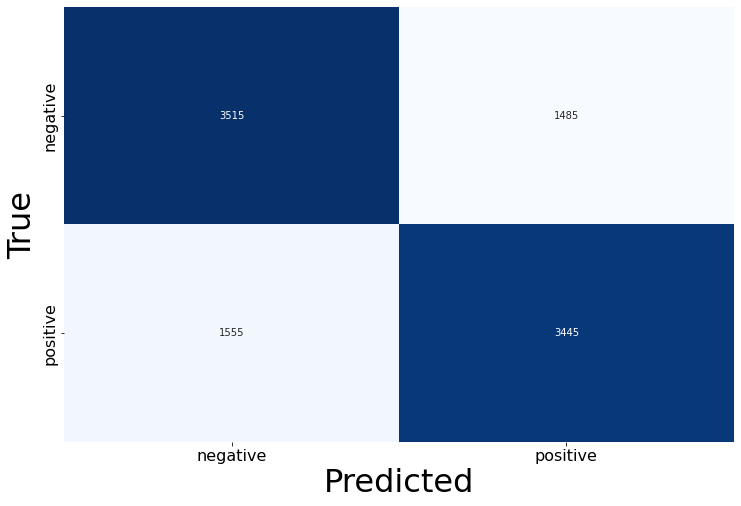

In [ ]:
cm = confusion_matrix(y_test, y_hat_lr)
fig = plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap= plt.cm.Blues, cbar=False, fmt='g')
plt.yticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xlabel('Predicted', size=32)
plt.ylabel('True', size=32)

<font size=3> Por último, creamos el reporte con las diferentes métricas que nos enriquecen la información previamente visualizada.

In [ ]:
report = pd.DataFrame(classification_report(y_hat_lr, y_test, target_names= list(data.sentiment.unique()), output_dict=True))
report

,negative,positive,accuracy,macro avg,weighted avg
precision,0.703000,0.689000,0.696,0.696000,0.696098
recall,0.693294,0.698783,0.696,0.696038,0.696000
f1-score,0.698113,0.693857,0.696,0.695985,0.696015
support,5070.000000,4930.000000,0.696,10000.000000,10000.000000


<font size=3> Por último, graficamos los vectores oración

Text(0, 0.5, 'Negative frequence')

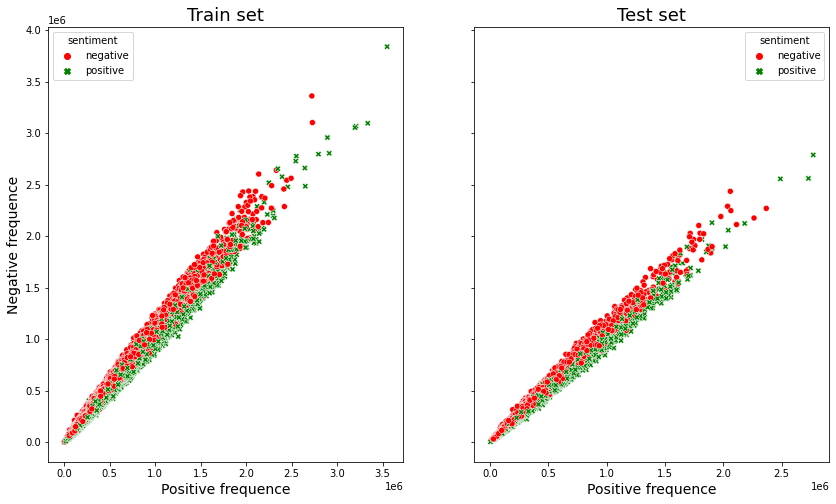

In [ ]:
fig = plt.figure(figsize=(14,8))
colors = ['red','green']
ax = fig.subplots(1,2,sharey=True)
sns.scatterplot(x=x_train[:,1], y=x_train[:,2], hue= data_train.sentiment, style= data_train.sentiment, palette=colors, ax=ax[0],hue_order=['negative','positive'],style_order=['negative','positive'])
sns.scatterplot(x=x_test[:,1], y=x_test[:,2], hue= data_test.sentiment, style= data_test.sentiment, palette=colors, ax=ax[1])
ax[0].set_title('Train set', fontsize=18)
ax[1].set_title('Test set',fontsize=18)
ax[0].set_xlabel('Positive frequence',fontsize=14)
ax[1].set_xlabel('Positive frequence',fontsize=14)
ax[0].set_ylabel('Negative frequence',fontsize=14)
ax[1].set_ylabel('Negative frequence',fontsize=14)

> <font size=3> Notemos que a pesar de ver una separación de los vectores de acuerdo al sentimiento, también es evidente que hay un margen bastante amplio de superposición, que es la causa de que con este enfoque los algoritmos tengan un desempeño regular.

#Modelo 2: 'Word embeddings'


<font size=3> Ahora, vamos a utilizar otro enfoque para resolver el problema. En este caso utilizaremos la vectorización por 'word embeddings', la cual consiste en crear un vector n-dimensional por cada palabra, para la creación de estos vectores se utilizan diversos métodos, principalmente mediante redes neuronales, nosotros crearemos nuestros propios *'word embeddings'* usando el método de **CBOW** o mejor conocido como *'bag of words'*.

## Creación de *'word embeddings'*

In [ ]:
from gensim.models import Word2Vec
sentences = pd.concat([data_train.review_clean, data_test.review_clean]) 
#Únicamente consideraremos aquellas palabras que aparecen más de 5 veces para crear los 'embeddings'
model = Word2Vec(sentences, min_count=5, size=128) 

In [ ]:
# Creamos un dataframe con las palabras vectorizadas
word_vec_unpack = [(word,idx) for idx,word in enumerate(model.wv.index2word)]
tokens, idx = zip(*word_vec_unpack)
word_vec_df = pd.DataFrame(model.wv.vectors[idx,:],index=tokens)
word_vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
movi,0.659595,-1.476329,-0.816383,0.171786,0.430232,0.561719,-1.700508,0.024800,1.584035,-0.933109,...,-1.281182,0.465794,0.327763,0.387771,-0.424569,0.953504,0.818846,0.046652,-0.123675,-0.380192
film,0.828416,-1.800963,-0.377063,0.361483,0.192781,-0.179183,-1.103609,0.106105,1.775574,-0.034261,...,-2.112021,0.448198,1.453308,0.290597,0.054671,0.752170,0.120555,0.333458,0.084989,-0.878819
one,0.387303,-1.181727,-0.821681,0.887586,0.085327,-0.149691,-1.133179,0.086066,1.250725,-0.770400,...,-0.001448,0.304887,1.900545,0.149750,-0.245643,1.084363,-0.574415,-0.279883,0.345186,-0.659510
like,-1.395548,0.359287,0.550781,-0.733795,-0.439936,1.153218,-1.647592,-0.312747,-0.574461,0.137859,...,-0.819242,1.083294,-1.456740,0.523339,0.086212,0.596514,1.573129,-0.672737,0.819931,-0.672655
time,-1.243563,-1.041085,0.193201,0.472848,-0.667396,0.463239,1.129475,1.418636,0.920092,-2.345547,...,1.765304,1.589414,-0.854854,-0.500046,-1.795109,2.743374,-1.834471,0.255389,-0.901965,-1.914902


## Creación de los vectores oración

<font size=3> Ya creados los *'word embeddings'* procedemos a vectorizar la reseña completa. Primero, en cada oración filtramos aquellas palabras que aparecen menos de 5 veces


In [ ]:
train_tokenized_array = np.array(data_train.review_clean)
test_tokenized_array = np.array(data_test.review_clean)

In [ ]:
# Función que filtra las palabras poco frecuentes
def select_words(sentence):
    words = []
    for word in sentence:
        if word in word_vec_df.index:
            words.append(word)
    return np.array(words)

In [ ]:
reduced_sentences_train = data_train.review_clean.apply(select_words)
reduced_sentences_train

29671    [made, year, later, would, ban, number, one, m...
4117     [gave, star, possibl, stori, open, end, left, ...
29819    [first, movi, given, year, ever, movi, need, w...
38032    [depict, hardship, woman, pre, wwii, rais, kid...
5684     [coincid, orca, made, two, year, jaw, orca, ex...
                               ...                        
30622    [far, sprightli, less, stage, set, bound, gene...
22088    [look, tv, guid, movi, come, germani, found, o...
34824    [everi, motion, pictur, bett, davi, star, wort...
1757     [spoiler, plot, spoil, madchen, amick, live, p...
26439    [must, confess, complet, shock, film, one, wen...
Name: review_clean, Length: 40000, dtype: object

In [ ]:
reduced_sentences_test = data_test.review_clean.apply(select_words)
reduced_sentences_test

1634    [believ, watch, whole, movi, anoth, ishtar, ke...
2739    [movi, serious, aw, act, worst, wors, student,...
4483    [mother, name, norma, lewi, cameron, diaz, liv...
4250    [saw, trailer, thought, god, movi, real, would...
9890    [movi, came, found, amazingli, great, especi, ...
                              ...                        
4209    [irrit, illog, flow, event, pretti, much, ever...
2628    [watch, four, bo, derek, vehicl, direct, husba...
842     [possibl, spoiler, ahead, gerald, mohr, busi, ...
3853    [first, let, say, enjoy, van, damm, movi, sinc...
6716    [definit, case, angel, outfield, tv, last, nig...
Name: review_clean, Length: 10000, dtype: object

<font size=3> Ahora, para vectorizar la reseña completa sumamos los *vectores-palabra* entrada por entrada

In [ ]:
model_train_array = np.array([word_vec_df.loc[doc].sum(axis=0) for doc in reduced_sentences_train])
model_test_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in reduced_sentences_test])

In [ ]:
model_train_df = pd.DataFrame(model_train_array)
model_train_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-4.218362,-46.329769,-23.343359,17.421015,-32.665047,12.351058,-54.001465,-13.144727,15.054274,-18.548271,...,-19.877474,45.845398,40.796162,26.048498,-0.397365,22.835917,-2.780169,-39.163055,5.280898,-17.170464
1,1.951491,-21.326189,-45.824734,37.316856,26.026552,1.250422,-40.929379,-0.133944,2.608880,-17.158039,...,-25.264153,1.327335,-10.202518,1.931046,-43.254917,14.289417,-5.346088,-10.580249,21.104986,-23.926291
2,20.993631,-17.913456,-3.644976,18.020210,-8.119580,24.752171,-45.478024,25.409229,9.015892,-47.294353,...,-19.390722,33.794071,7.051026,11.547998,-32.081951,21.027676,2.566453,-10.600192,-1.746017,-24.295023
3,9.114190,-33.166962,-35.698093,14.059671,22.270103,21.219296,-34.590561,-4.521913,28.668856,-11.600069,...,-15.638967,42.303329,29.621956,-2.587989,-32.664032,23.881222,-16.347559,-4.836981,7.332367,14.314100
4,-3.409673,-44.860416,-43.183937,36.802597,12.424358,2.110783,-58.844505,19.588051,26.960138,-27.346777,...,-22.121529,48.893410,25.733194,10.331219,-21.323458,60.551907,-13.568385,-11.259241,25.888657,-15.576780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,6.606811,-13.233215,-25.434130,20.467665,-1.406161,-15.899282,-34.096691,-23.558140,-7.105301,-20.859505,...,-22.849697,40.025036,21.374371,9.639853,-4.028836,6.063735,-39.835831,-24.895895,6.026165,-18.235434
39996,16.717283,-31.097178,-5.448577,33.500343,-10.457499,18.580376,-19.495600,18.949896,41.600075,-57.803902,...,8.518215,15.885121,-3.023057,3.038675,-35.085682,15.370980,14.071167,3.413415,1.531998,-12.860723
39997,14.328686,-90.984177,-48.588062,-13.281771,-19.217031,66.735001,-52.004395,-58.167633,39.477058,1.992581,...,20.009943,153.143265,85.125603,-40.889149,26.162340,36.518032,-138.638657,-67.016853,25.018572,-126.861420
39998,0.295734,-12.671872,-25.821480,27.522049,1.180921,-3.710779,-30.186829,6.026566,-1.331957,-32.180931,...,-12.392455,20.734999,17.713396,39.911041,-30.449648,30.286562,-31.635292,-7.369057,-0.103607,1.769627


In [ ]:
model_test_df = pd.DataFrame(model_test_array)
model_test_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.154282,-0.297692,-0.236498,0.364417,0.013495,-0.125053,-0.583833,0.061430,0.223817,-0.395714,...,-0.155817,0.265607,0.014873,0.286063,-0.357561,0.310722,-0.137404,-0.216718,0.051103,-0.006087
1,0.254721,-0.498260,-0.249321,0.678331,0.142864,0.170738,-1.014259,0.112687,0.323490,-0.492153,...,-0.168239,0.181521,0.310622,0.260807,0.087074,0.814417,-0.140608,-0.574665,-0.037857,0.005689
2,0.147638,-0.380446,-0.323617,0.287975,-0.000030,0.115347,-0.267503,0.088053,0.012781,-0.251487,...,-0.080699,0.288143,0.256645,0.239276,-0.250694,0.165178,-0.216514,-0.071588,0.092019,-0.043538
3,0.135465,-0.433941,-0.200898,0.283505,-0.052381,0.071987,-0.712472,0.183877,0.206105,-0.446494,...,-0.191548,0.385526,0.018847,0.401956,-0.480046,0.548667,-0.049229,-0.220443,0.067143,-0.249344
4,0.102251,-0.706142,-0.036126,0.117735,-0.141367,0.392763,-0.740666,-0.089013,0.252658,-0.329260,...,0.084388,0.212476,-0.092331,-0.034158,-0.333665,0.481000,0.339592,-0.204743,0.150621,0.096009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.412191,-0.129020,-0.290206,0.351661,-0.127372,0.328301,-1.005169,0.418107,0.081662,-0.516317,...,-0.202004,0.392709,0.117378,0.521271,-0.555173,0.526052,0.107654,-0.322782,-0.155562,-0.154351
9996,0.038928,-0.250391,-0.286707,0.235166,-0.043025,0.009031,-0.352255,-0.149894,0.014128,-0.143568,...,-0.203000,0.152091,0.017287,0.012767,-0.126440,0.139007,-0.199113,-0.199500,0.092315,-0.138027
9997,0.095078,-0.016787,-0.187997,0.069046,0.077719,-0.216540,-0.146409,0.113918,-0.178423,0.321837,...,-0.206592,0.152895,-0.066821,0.050701,-0.114550,0.145491,-0.044537,0.250810,0.248435,-0.159643
9998,-0.105501,-0.534052,0.071757,0.216841,-0.186096,0.380441,-1.093763,-0.229855,0.199508,-0.434439,...,0.059387,0.399777,0.387904,0.161907,-0.106298,0.404987,0.332167,-0.257708,0.343473,-0.145922


## Entrenamiento del modelo

<font size=3> Para que los resultados puedan ser comparables, utilizaremos los mismos algoritmos con los mismos hiperparámetros que se usaron en el método anterior

In [ ]:
LR.fit(model_train_df,y_train)
RFC.fit(model_train_df,y_train)
GBC.fit(model_train_df,y_train)
SGD.fit(model_train_df,y_train)
ABC.fit(model_train_df,y_train)
HGBC.fit(model_train_df,y_train)
SVM.fit(model_train_df,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SVC(C=0.8)

## Evaluación del modelo

In [ ]:
Y_hat_RFC = RFC.predict(model_test_array)
Y_hat_GBC = GBC.predict(model_test_array)
Y_hat_SGD = SGD.predict(model_test_array)
Y_hat_ABC = SGD.predict(model_test_array)
Y_hat_HGBC = HGBC.predict(model_test_array)
Y_hat_SVM = SVM.predict(model_test_array)
Y_hat_LR = LR.predict(model_test_array)

In [ ]:
print('Precisión del modelo LR:\t ',(accuracy_score(y_test, Y_hat_LR)))
print('Precisión del modelo RFC:\t ',(accuracy_score(y_test, Y_hat_RFC)))
print('Precisión del modelo GBC:\t ',(accuracy_score(y_test, Y_hat_GBC)))
print('Precisión del modelo SGD:\t ',(accuracy_score(y_test, Y_hat_SGD)))
print('Precisión del modelo ABC:\t ',(accuracy_score(y_test, Y_hat_ABC)))
print('Precisión del modelo HGBC:\t ',(accuracy_score(y_test, Y_hat_HGBC)))
print('Precisión del modelo SVM:\t ',(accuracy_score(y_test, Y_hat_SVM)))

Precisión del modelo LR:	  0.8652
Precisión del modelo RFC:	  0.5004
Precisión del modelo GBC:	  0.5001
Precisión del modelo SGD:	  0.5028
Precisión del modelo ABC:	  0.5028
Precisión del modelo HGBC:	  0.501
Precisión del modelo SVM:	  0.5


Text(87.0, 0.5, 'True')

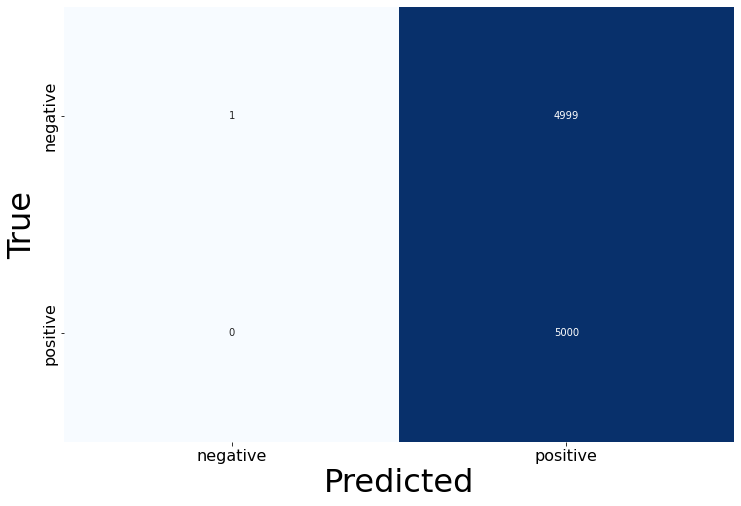

In [ ]:
  cm = confusion_matrix(y_test, Y_hat_HGBC)
fig = plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap= plt.cm.Blues, cbar=False, fmt='g')
plt.yticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xlabel('Predicted', size=32)
plt.ylabel('True', size=32)

In [ ]:
report = pd.DataFrame(classification_report(Y_hat_GBC, y_test, target_names= list(data.sentiment.unique()), output_dict=True))
report

,negative,positive,accuracy,macro avg,weighted avg
precision,0.0002,1.000000,0.5001,0.500100,0.999900
recall,1.0000,0.500050,0.5001,0.750025,0.500100
f1-score,0.0004,0.666711,0.5001,0.333556,0.666644
support,1.0000,9999.000000,0.5001,10000.000000,10000.000000


> <font size=3> Contrariamente a lo esperado, el desempeño promedio decayó a 50 %, esto a pesar de que en la literatura el método se considera más preciso. Una posible explicación de ello podría ser  que la alta dimensionalidad de los vectores *(n=128)* mete  más '*ruido*' del que los algoritmos pueden manejar, por lo que haremos un pequeño ajuste reduciendo su dimensionalidad.

## Reducción de dimensionalidad del modelo: PCA

<font size=3> Esta herramienta nos permite reducir vectores de alta dimensionalidad a espacios más pequeños, conservando la mayor cantidad de información posible en el proceso.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, svd_solver='full')
embeddings_pca = pca.fit_transform(word_vec_df)

In [ ]:
print('Cantidad de componentes después de la reducción: ', pca.n_components_)

Cantidad de componentes después de la reducción:  72


In [ ]:
embeddings_pca_df = pd.DataFrame(embeddings_pca, index=tokens)
embeddings_pca_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
movi,-7.330474,2.071408,2.879369,0.803159,2.752317,0.215715,1.439779,1.474586,-1.011535,-1.623722,...,1.654258,-0.339454,0.482617,-0.126385,0.211512,-0.240213,0.079162,-0.377435,0.479121,-0.803962
film,-6.184039,3.128445,-0.076288,1.845287,0.198983,0.667160,0.037908,0.769337,-0.497128,-1.098803,...,1.959197,-0.138675,0.361879,-0.571760,-0.076833,-0.325471,-0.157341,-0.526473,0.369576,-0.868404
one,-4.074256,0.540610,1.321994,0.138511,1.935899,0.750692,0.033426,1.626435,-1.577865,-0.841339,...,0.706033,0.409010,-2.015519,-0.703547,1.238561,0.234270,0.605323,-0.086277,-0.511177,-0.156433
like,-2.948464,0.394781,3.065006,-0.003607,1.157835,0.294587,2.085142,0.399499,-1.505535,-0.591707,...,0.123988,-0.466520,-1.548095,-1.017481,0.415498,0.683433,-0.525353,1.086610,0.118955,-0.465256
time,-5.268942,0.001370,1.246014,0.996377,2.368351,2.018679,-0.902717,0.571744,-1.071952,-0.450284,...,-1.675093,0.437599,0.209053,0.654842,0.444204,-0.433660,0.129761,1.299563,-0.131902,1.546697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thrush,-0.113732,0.173507,0.137046,0.079602,0.058993,0.007007,-0.050902,0.099577,-0.011183,-0.037938,...,0.015327,0.009291,-0.043533,0.025620,-0.004822,-0.001134,0.017880,-0.017041,-0.012310,0.012394
sdiner,-0.349310,0.158454,0.196268,0.007115,0.214516,0.044181,0.042034,-0.009739,0.005309,0.120657,...,0.034429,0.029911,0.010674,0.032205,0.008052,0.032117,-0.021064,-0.005010,0.052944,0.009144
kyd,-0.177857,0.100574,0.188925,-0.074564,0.174227,0.110399,0.041563,0.044167,0.012017,-0.043728,...,-0.038204,-0.009718,0.006229,0.028457,-0.021223,-0.053174,0.057056,0.005914,-0.025351,0.012487
alja,-0.265902,0.153260,0.115467,-0.066813,0.188223,-0.002438,0.007071,-0.065808,0.030124,0.036500,...,-0.025764,-0.019564,0.023530,0.009964,-0.009107,0.000549,0.023567,-0.015163,-0.011165,0.005575


<font size=3> Reasignamos los conjuntos de entrenamiento y prueba a los vectores reducidos

In [ ]:
model_train_array = np.array([embeddings_pca_df.loc[doc].sum(axis=0) for doc in reduced_sentences_train])
model_test_array = np.array([embeddings_pca_df.loc[doc].sum(axis=0) for doc in reduced_sentences_test])

## Entrenamiento del modelo PCA

In [ ]:
RFC.fit(model_train_array,y_train)
GBC.fit(model_train_array,y_train)
SGD.fit(model_train_array,y_train)
ABC.fit(model_train_array,y_train)
HGBC.fit(model_train_array,y_train)
SVM.fit(model_train_array,y_train)
LR.fit(model_train_array,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, solver='saga')

## Evaluación del modelo_PCA

In [ ]:
Y_hat_RFC = RFC.predict(model_test_array)
Y_hat_GBC = GBC.predict(model_test_array)
Y_hat_SGD = SGD.predict(model_test_array)
Y_hat_ABC = SGD.predict(model_test_array)
Y_hat_HGBC = HGBC.predict(model_test_array)
Y_hat_SVM = SVM.predict(model_test_array)
Y_hat_LR = LR.predict(model_test_array)

In [ ]:
print('Precisión del modelo GBC:\t ',(accuracy_score(y_test, Y_hat_GBC)))
print('Precisión del modelo SGD:\t ',(accuracy_score(y_test, Y_hat_SGD)))
print('Precisión del modelo ABC:\t ',(accuracy_score(y_test, Y_hat_ABC)))
print('Precisión del modelo HGBC:\t ',(accuracy_score(y_test, Y_hat_HGBC)))
print('Precisión del modelo SVM:\t ',(accuracy_score(y_test, Y_hat_SVM)))
print('Precisión del modelo RFC:\t ',(accuracy_score(y_test, Y_hat_RFC)))
print('Precisión del modelo LR:\t ',(accuracy_score(y_test, Y_hat_LR)))

Precisión del modelo GBC:	  0.8404
Precisión del modelo SGD:	  0.8058
Precisión del modelo ABC:	  0.8058
Precisión del modelo HGBC:	  0.8543
Precisión del modelo SVM:	  0.8654
Precisión del modelo RFC:	  0.837
Precisión del modelo LR:	  0.8612


Text(87.0, 0.5, 'True')

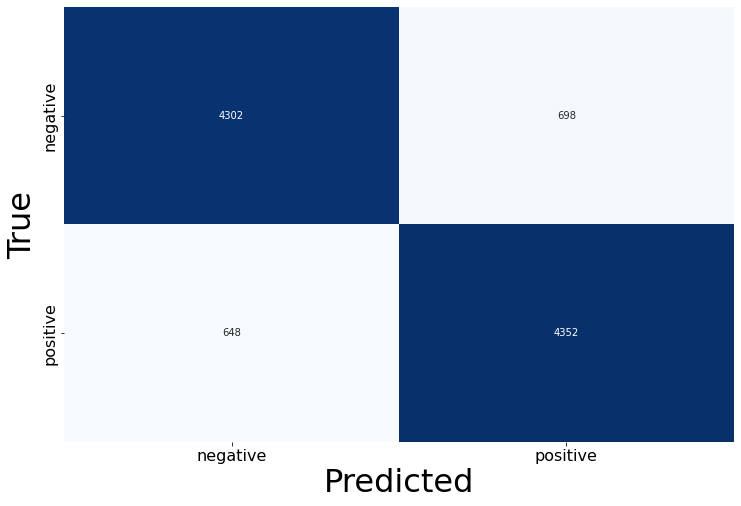

In [ ]:
cm = confusion_matrix(y_test, Y_hat_SVM)
fig = plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap= plt.cm.Blues, cbar=False, fmt='g')
plt.yticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xlabel('Predicted', size=32)
plt.ylabel('True', size=32)

In [ ]:
report = pd.DataFrame(classification_report(Y_hat_SVM, y_test, target_names= list(data.sentiment.unique()), output_dict=True))
report


,negative,positive,accuracy,macro avg,weighted avg
precision,0.860400,0.870400,0.8654,0.865400,0.865450
recall,0.869091,0.861782,0.8654,0.865437,0.865400
f1-score,0.864724,0.866070,0.8654,0.865397,0.865403
support,4950.000000,5050.000000,0.8654,10000.000000,10000.000000


> <font size=3> Vemos que con este ajuste de dimensionalidad hubo un incremento promedio en la precisión del modelo de alrededor del 35% con respecto a los vectores completos y alrededor del 15% por ciento respecto al enfoque frecuentista, lo que es una mejora sustancial del modelo.

# Conclusiones

<font size=4>

*   El método de 'word embeddings'-PCA provó ser más eficaz que su contraparte frecuentista.

*   'Words embeddings'-PCA es un método que combina efectividad con optimización de recursos.

*   El análisis de sentimiento es muy útil para obtener información de interés de diversos textos

*   Se puede ampliar su uso a otras categorías y adecuar a nuestras necesidades.
